## Table of Contents

### 1. [Import Libraries](#import-libraries)

In [56]:
import pandas as pd
import numpy as np
from branca.colormap import linear
import gc
import ast
import re

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import kruskal



# Packages for machine learning
import sklearn as sk

# Packages for data preprocessing
from sklearn.preprocessing import  RobustScaler, LabelEncoder

# Data splitting, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ML Algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier

# Data Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Optimization - Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Optimization - Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2
from sklearn.impute import SimpleImputer

random_state = 42

### 2. [Load & Inspect Data](#load--inspect-data)

#### Original Dataset (Already save to new csv)

   - [Import Data](#ImportData)

In [57]:
# #import business dataset
# file_path_business = "./Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json"

# df_business = pd.read_json(file_path_business, lines=True)

# df_business.head()

In [58]:
# #import review dataset
# file_path_review = "./Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json"

# #review data
# df_review = pd.read_json(file_path_review, lines=True)

# df_review.head()



   - [Merge the Data](#MergetheData)

In [59]:
# #merge two dataset
# df_merged = pd.merge(df_review, df_business, on="business_id", how="inner")

# df_merged.head(10)

In [60]:
# df_merged.shape

In [61]:
# df_merged["categories"].unique()

   - [Filter categories](#Filtercategories)

In [62]:
# keywords = "bubble|boba|tea"
# df_bubble_original = df_merged[df_merged["categories"].str.contains(keywords, case=False, na=False)]

# df_bubble_original.to_csv("bubble_reviews.csv", index=False)

#### Import new csv

In [63]:
df_bubble = pd.read_csv('./bubble_reviews.csv')

In [118]:
df_bubble.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'}
2,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,Milktooth,...,IN,46203,39.759169,-86.146494,4.0,1379,1,"{'GoodForKids': 'True', 'Alcohol': ""u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',..."
3,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,BK Tacos,...,AZ,85719,32.255834,-110.960560,4.0,492,1,"{'RestaurantsTakeOut': 'True', 'HasTV': 'True'...","Restaurants, Tacos, Mexican, Hot Dogs, Breakfa...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
4,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,Rittenhouse Grill,...,PA,19103,39.948949,-75.169532,3.5,290,1,"{'RestaurantsAttire': ""u'dressy'"", 'Restaurant...","Wine Bars, Restaurants, Nightlife, Steakhouses...","{'Wednesday': '16:30-22:0', 'Thursday': '16:30..."


* star_x is in review.json
* star_y is in business.json


In [65]:
df_bubble.shape

(779075, 22)

In [119]:
keywords = "bubble|boba"
df_bubble_without_tea = df_bubble[df_bubble["categories"].str.contains(keywords, case=False, na=False)]

df_bubble_without_tea.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
29,mRnYZes0nj4sr8DsE_gWMQ,FuTJWFYm4UKqewaosss1KA,fgTOJRkc703E4XRdcr5zRA,3,3,0,0,I've come from Cali where boba is very common ...,2016-01-30 01:59:11,Chatime - Bubble Tea Cafe,...,AZ,85719,32.264136,-110.944935,3.5,182,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Cafes, Restaurants, Taiwanese, Desserts, Juice...","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."
52,e8u5K7rpzWt3CEoGmqYZNA,TkFfkUhNLczx5LB-uR9qaw,7EhTT4iEuA7JaaWA-eI3Qw,5,7,5,7,I really enjoy this little restaurant full of ...,2016-01-04 04:42:19,Seasons Cafe & Bakery,...,FL,33781,27.838462,-82.682464,4.0,292,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Food, Bakeries, Asian Fusion, Vietnamese, Rest...","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."
53,ndy1YoqgJ6BXsqPvFs9mkg,3Co7fpeBhUJGFJKbh1JAkw,B7nlRFe3EeQwAWpUpefGHA,3,0,0,0,Overpriced for what you get. I think this is a...,2017-08-28 22:34:34,Provisions Coffee & Kitchen,...,FL,33544,28.241830,-82.351914,4.5,261,1,"{'GoodForKids': 'True', 'Ambience': ""{'tourist...","Bakeries, Coffee & Tea, Bars, Donuts, Beer Bar...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
56,bjBfJVb8Ikpz2Lbx-S-gyg,f3LI3ld5tNxXrMUU69v7wA,mcr1lAEdvGLMJhuPwI3I2A,5,0,0,0,Pleasantly surprised to find Taiwanese restaur...,2016-12-04 02:58:26,101 Taiwanese Cuisine,...,NV,89503,39.529867,-119.820173,4.0,1145,1,"{'RestaurantsPriceRange2': '2', 'Alcohol': ""u'...","Food, Restaurants, Chinese, Bubble Tea, Taiwanese","{'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0..."
67,B-7TUHzZyMUsmt5dbUUxlw,RaC8QCJGJu0K3uPsDE0TKg,mcr1lAEdvGLMJhuPwI3I2A,5,1,0,1,In Reno for the night. Was a bit skeptical bec...,2015-01-04 04:40:12,101 Taiwanese Cuisine,...,NV,89503,39.529867,-119.820173,4.0,1145,1,"{'RestaurantsPriceRange2': '2', 'Alcohol': ""u'...","Food, Restaurants, Chinese, Bubble Tea, Taiwanese","{'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0..."


In [67]:
df_bubble_without_tea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39974 entries, 29 to 779064
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     39974 non-null  object 
 1   user_id       39974 non-null  object 
 2   business_id   39974 non-null  object 
 3   stars_x       39974 non-null  int64  
 4   useful        39974 non-null  int64  
 5   funny         39974 non-null  int64  
 6   cool          39974 non-null  int64  
 7   text          39974 non-null  object 
 8   date          39974 non-null  object 
 9   name          39974 non-null  object 
 10  address       39938 non-null  object 
 11  city          39974 non-null  object 
 12  state         39974 non-null  object 
 13  postal_code   39974 non-null  object 
 14  latitude      39974 non-null  float64
 15  longitude     39974 non-null  float64
 16  stars_y       39974 non-null  float64
 17  review_count  39974 non-null  int64  
 18  is_open       39974 non-null 

In [68]:
df_bubble_without_tea.describe()

,stars_x,useful,funny,cool,latitude,longitude,stars_y,review_count,is_open
count,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000
mean,4.070696,1.163131,0.331941,0.677365,36.009875,-90.164139,4.065067,232.827938,0.847901
std,1.255316,3.000026,1.678023,2.575971,5.203334,15.934208,0.471680,247.975924,0.359121
min,1.000000,0.000000,0.000000,0.000000,27.721490,-119.885904,2.500000,5.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,30.009004,-90.344489,4.000000,85.000000,1.000000
50%,5.000000,0.000000,0.000000,0.000000,38.656246,-86.072389,4.000000,157.000000,1.000000
75%,5.000000,1.000000,0.000000,1.000000,39.953490,-75.212444,4.500000,259.000000,1.000000
max,5.000000,195.000000,103.000000,185.000000,53.646229,-74.754646,5.000000,1145.000000,1.000000


   - [business.json Description](#business.jsonDescription)

| Column        | Description                                    | Mandarin                                       |
| ------------- | ---------------------------------------------- | ------------------------------------------- |
| business\_id  | string, 22-character unique string business id | 商家 ID（唯一識別碼，22 位字串）                         |
| name          | string, the business's name                    | 商家名稱                                        |
| address       | string, the full address of the business       | 地址                                          |
| city          | string, the city                               | 城市                                          |
| state         | string, 2-character state code                 | 州/省代碼（2 碼）                                  |
| postal\_code  | string, postal code                            | 郵遞區號                                        |
| latitude      | float, latitude                                | 緯度                                          |
| longitude     | float, longitude                               | 經度                                          |
| stars         | float, star rating, rounded to half-stars      | 星等（半顆星為單位）                                  |
| review\_count | integer, number of reviews                     | 總評論數                                        |
| is\_open      | integer, 0 = 關閉, 1 = 營業中                   | 是否營業                                        |
| attributes    | object, business attributes to values          | 商家屬性（例如：停車場、是否外帶）                           |
| categories    | array of strings                               | 類別（例：Restaurants, Bubble Tea, Coffee & Tea） |
| hours         | object, key=星期, value=營業時間                | 營業時間（24 小時制）                                |


   - [review.json Description](#review.jsonDescription)

| Column       | Description                           | Mandarin                           |
| ------------ | ------------------------------------- | ----------------------- |
| review\_id   | string, 22-character unique review id | 評論 ID（唯一識別碼）            |
| user\_id     | string, 22-character unique user id   | 使用者 ID（對應 user.json）    |
| business\_id | string, 22-character business id      | 商家 ID（對應 business.json） |
| stars        | integer, star rating                  | 評論星等                    |
| date         | string, YYYY-MM-DD                    | 評論日期                    |
| text         | string, the review itself             | 評論文字                    |
| useful       | integer, number of useful votes       | 被標記為有用的次數               |
| funny        | integer, number of funny votes        | 被標記為有趣的次數               |
| cool         | integer, number of cool votes         | 被標記為酷的次數                |


### 3. [Initial Exploratory Data Analysis (EDA)](#InitialExploratoryDataAnalysis(EDA))

   - [Check missing value](#Checkmissingvalue)

In [69]:
df_bubble_without_tea.isnull().sum().sort_values(ascending=False).head(10)

hours           970
attributes       95
address          36
state             0
categories        0
is_open           0
review_count      0
stars_y           0
longitude         0
latitude          0
dtype: int64

   - [Distribution of ratings（stars_x-review stars）](#Distributionofratings（stars_x）)

C:\Users\User\AppData\Local\Temp\ipykernel_17540\379079027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="stars_x", data=df_bubble_without_tea, palette="Set2")


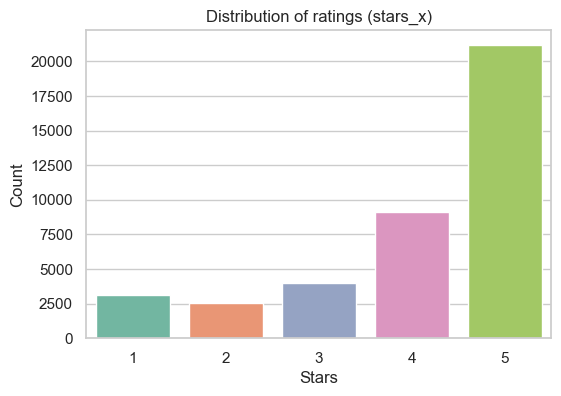

In [70]:
plt.figure(figsize=(6,4))
sb.countplot(x="stars_x", data=df_bubble_without_tea, palette="Set2")
plt.title("Distribution of ratings (stars_x)")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

   - [Review time range](#Reviewtimerange)

In [71]:
print("\nEarliest review date:", df_bubble_without_tea['date'].min())
print("Latest review date：", df_bubble_without_tea['date'].max())


Earliest review date: 2007-02-01 03:22:56
Latest review date： 2022-01-19 18:29:45


   - [Number of reviews per year](#Numberofreviewsperyear)

C:\Users\User\AppData\Local\Temp\ipykernel_17540\4231844490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble_without_tea['date'] = pd.to_datetime(df_bubble_without_tea['date'], errors='coerce')


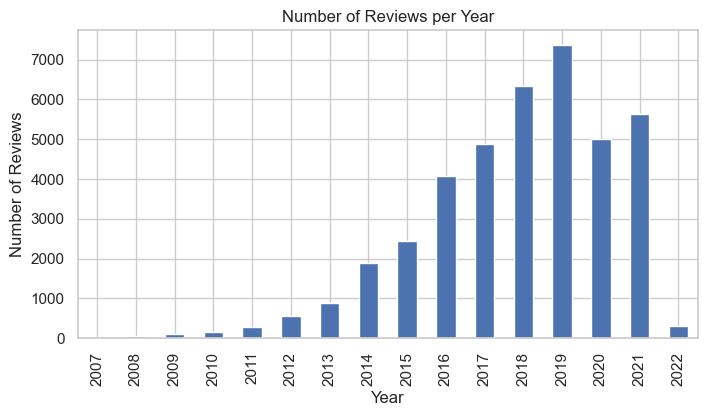

In [72]:
df_bubble_without_tea['date'] = pd.to_datetime(df_bubble_without_tea['date'], errors='coerce')
review_per_year = df_bubble_without_tea.groupby(df_bubble_without_tea['date'].dt.year)['review_id'].count()

plt.figure(figsize=(8,4))
review_per_year.plot(kind="bar")
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


   - [Geographic distribution (check latitude/longitude ranges)](#Geographicdistributionchecklatitude/longituderanges)

In [73]:
print("\nLatitude range:", df_bubble_without_tea['latitude'].min(), " ~ ", df_bubble_without_tea['latitude'].max())
print("Longitude range:", df_bubble_without_tea['longitude'].min(), " ~ ", df_bubble_without_tea['longitude'].max())


Latitude range: 27.72149  ~  53.6462293235
Longitude range: -119.8859044  ~  -74.754646


   - [Conclution](#Conclution)

1. Missing values are mainly in hours (16,575), attributes (866), address (860) and postal_code (42), while most other fields are complete.
2. Ratings are skewed toward positive, with 5 stars dominating the distribution, but a considerable amount of negative reviews remain for further analysis.
3. The dataset spans from 2005 to 2022, covering 17 years of reviews.
4. The number of reviews grew rapidly after 2010, peaking during 2017–2019, then declining slightly after 2020.
5. Latitude and longitude ranges confirm that most reviews are from the continental U.S.

### 4. [Data Cleaning](#DataCleaning)

   - [Remove duplicates](#Removeduplicates)

In [74]:
duplicates_review_id = df_bubble_without_tea['review_id'].duplicated().sum()
print("Number of duplicate review_id:", duplicates_review_id)

Number of duplicate review_id: 0


   - [Handling outliers about feedback columns](#Handlingoutliers)

In [75]:
review_agree = {
    'useful':  (df_bubble_without_tea['useful'] < 0).sum(),
    'funny':   (df_bubble_without_tea['funny'] < 0).sum(),
    'cool':    (df_bubble_without_tea['cool'] < 0).sum()
}

print("Number of outliers in each column：", review_agree)

Number of outliers in each column： {'useful': 0, 'funny': 0, 'cool': 0}


In [76]:
# Change the negative values ​​of useful, funny, and cool columns to 0
cols = ['useful', 'funny', 'cool']
df_bubble_without_tea.loc[:, cols] = df_bubble_without_tea[cols].clip(lower=0)


# Check the value again
check_review_agree_after = (df_bubble_without_tea[cols] < 0).sum()
print("Number of outliers in each column：\n", check_review_agree_after)



Number of outliers in each column：
 useful    0
funny     0
cool      0
dtype: int64


In [77]:
df_bubble_without_tea.describe()

,stars_x,useful,funny,cool,date,latitude,longitude,stars_y,review_count,is_open
count,39974.000000,39974.000000,39974.000000,39974.000000,39974,39974.000000,39974.000000,39974.000000,39974.000000,39974.000000
mean,4.070696,1.163131,0.331941,0.677365,2018-05-16 14:23:02.952268800,36.009875,-90.164139,4.065067,232.827938,0.847901
min,1.000000,0.000000,0.000000,0.000000,2007-02-01 03:22:56,27.721490,-119.885904,2.500000,5.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,2016-11-14 01:19:59.750000128,30.009004,-90.344489,4.000000,85.000000,1.000000
50%,5.000000,0.000000,0.000000,0.000000,2018-09-20 00:28:36,38.656246,-86.072389,4.000000,157.000000,1.000000
75%,5.000000,1.000000,0.000000,1.000000,2020-02-19 17:48:45,39.953490,-75.212444,4.500000,259.000000,1.000000
max,5.000000,195.000000,103.000000,185.000000,2022-01-19 18:29:45,53.646229,-74.754646,5.000000,1145.000000,1.000000
std,1.255316,3.000026,1.678023,2.575971,NaN,5.203334,15.934208,0.471680,247.975924,0.359121


   - [Handling missing values](#Handlingmissingvalues)

In [78]:
df_bubble_without_tea.isnull().sum().sort_values(ascending=False).head(5)

hours         970
attributes     95
address        36
state           0
categories      0
dtype: int64

   - [1. Handilng hours](#Handilnghours)

In [79]:
print(df_bubble_without_tea['hours'].head(5))

29    {'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...
52    {'Monday': '11:0-21:0', 'Wednesday': '11:0-21:...
53    {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...
56    {'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0...
67    {'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0...
Name: hours, dtype: object


In [80]:
print(df_bubble_without_tea['hours'][df_bubble_without_tea['hours'].isna()].head(5))

1058     NaN
8572     NaN
15447    NaN
15880    NaN
19939    NaN
Name: hours, dtype: object


In [81]:
df_bubble_without_tea['hours_dict'] = df_bubble_without_tea['hours'].dropna().apply(ast.literal_eval)

hours_expanded = pd.json_normalize(df_bubble_without_tea['hours_dict'].dropna())
print(hours_expanded.head())


      Monday    Tuesday   Wednesday    Thursday      Friday    Saturday  \
0  12:0-21:0  12:0-21:0   12:0-21:0   12:0-21:0   12:0-21:0   12:0-21:0   
1  11:0-21:0        NaN   11:0-21:0   11:0-21:0   11:0-21:0   11:0-21:0   
2   7:0-16:0   7:0-16:0    7:0-16:0    7:0-16:0    7:0-12:0    8:0-14:0   
3    0:0-0:0        NaN  16:30-21:0  16:30-21:0  16:30-21:0  16:30-21:0   
4    0:0-0:0        NaN  16:30-21:0  16:30-21:0  16:30-21:0  16:30-21:0   

       Sunday  
0   12:0-21:0  
1   11:0-21:0  
2    8:0-16:0  
3  16:30-21:0  
4  16:30-21:0  


C:\Users\User\AppData\Local\Temp\ipykernel_17540\810955088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble_without_tea['hours_dict'] = df_bubble_without_tea['hours'].dropna().apply(ast.literal_eval)


In [82]:
df_bubble_without_tea['hours_dict'] = df_bubble_without_tea['hours_dict'].fillna('Unknown')

C:\Users\User\AppData\Local\Temp\ipykernel_17540\1747166826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble_without_tea['hours_dict'] = df_bubble_without_tea['hours_dict'].fillna('Unknown')


In [83]:
df_bubble_without_tea = df_bubble_without_tea.drop(columns=['hours'])

   - [2. Handilng attributes](#Handilngattributes)

In [84]:
print(df_bubble_without_tea['attributes'].head(5))

29    {'RestaurantsPriceRange2': '1', 'BusinessParki...
52    {'Ambience': "{'romantic': False, 'intimate': ...
53    {'GoodForKids': 'True', 'Ambience': "{'tourist...
56    {'RestaurantsPriceRange2': '2', 'Alcohol': "u'...
67    {'RestaurantsPriceRange2': '2', 'Alcohol': "u'...
Name: attributes, dtype: object


In [85]:
print(df_bubble_without_tea['attributes'][df_bubble_without_tea['attributes'].isna()].head(5))


94079     NaN
94698     NaN
111159    NaN
118860    NaN
126980    NaN
Name: attributes, dtype: object


In [86]:
df_bubble_without_tea['attributes'] = df_bubble_without_tea['attributes'].fillna('Unknown')

   - [3. Handilng address](#Handilngaddress)

In [87]:
df_bubble_without_tea = df_bubble_without_tea.drop(columns=['address'])

In [88]:
df_bubble_without_tea.isnull().sum().sort_values(ascending=False).head(5)

review_id     0
state         0
categories    0
attributes    0
is_open       0
dtype: int64

### 5. [Exploratory Data Analysis (EDA)](#ExploratoryDataAnalysis(EDA))

   - [Time Trend Analysis](#TimeTrendAnalysis)

In [89]:
df_bubble_without_tea['year'] = df_bubble_without_tea['date'].dt.year       # year
df_bubble_without_tea['month'] = df_bubble_without_tea['date'].dt.month     # month (1-12)
df_bubble_without_tea['weekday'] = df_bubble_without_tea['date'].dt.weekday + 1 # weekday (1 = Monday, 7 = Sunday)

<Axes: title={'center': 'Reviews per Year'}, xlabel='year'>

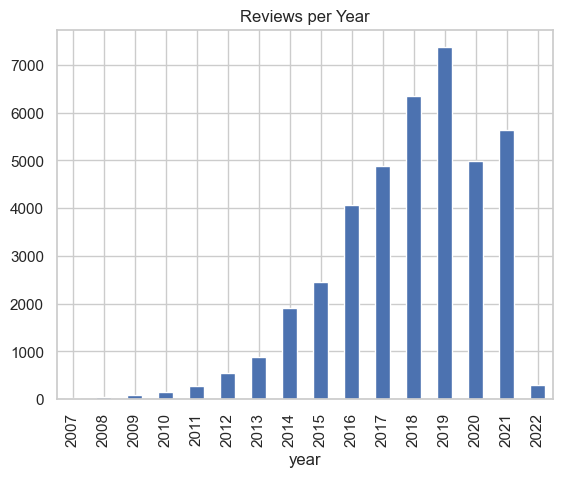

In [90]:
df_bubble_without_tea.groupby('year')['review_id'].count().plot(kind='bar', title="Reviews per Year")

Conclusions

* The number of reviews grew rapidly from 2014, peaking in 2019. 
* After that, the count declined, possibly due to external factors such as the pandemic.

<Axes: title={'center': 'Reviews per Month'}, xlabel='month'>

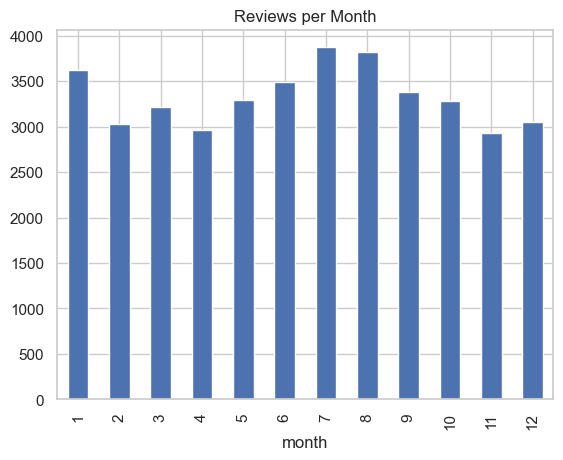

In [91]:
df_bubble_without_tea.groupby('month')['review_id'].count().plot(kind='bar', title="Reviews per Month")

Conclusions

* Reviews are relatively evenly distributed across months, with a slight increase in summer (especially July and August), suggesting higher popularity during hot seasons.

<Axes: title={'center': 'Reviews by Weekday'}, xlabel='weekday'>

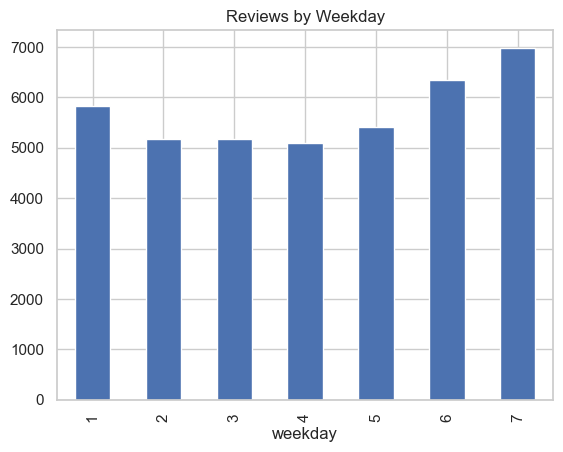

In [92]:
df_bubble_without_tea.groupby('weekday')['review_id'].count().plot(kind='bar', title="Reviews by Weekday")

Conclusions

* Reviews are highest on weekends, especially Sundays, while weekdays (Tue–Thu) show lower activity. 
* This reflects typical consumer dining and outing behavior. 

<Axes: title={'center': 'Average Stars per Year'}, xlabel='year'>

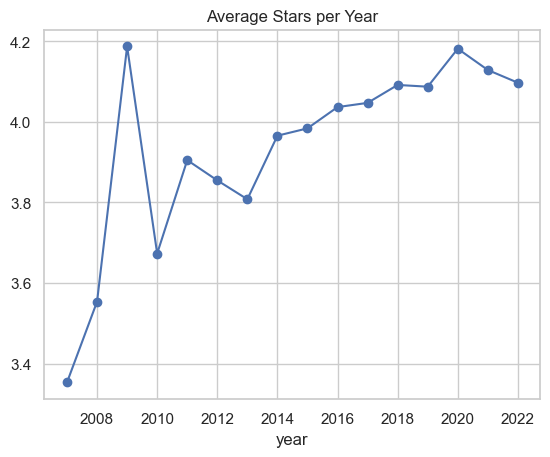

In [93]:
df_bubble_without_tea.groupby('year')['stars_x'].mean().plot(kind='line', marker='o', title="Average Stars per Year")

Conclusions
* Average ratings fluctuated in the early years but stabilized after 2014, gradually improving to above 4 stars, reflecting increased customer satisfaction.
* In the early years, the number of reviews was very small, so a few extreme positive or negative ratings could greatly shift the average.

<Axes: title={'center': 'Average Stars by Weekday'}, xlabel='weekday'>

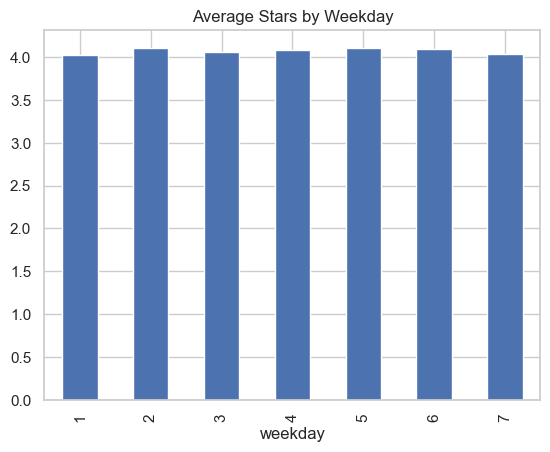

In [94]:
df_bubble_without_tea.groupby('weekday')['stars_x'].mean().plot(kind='bar', title="Average Stars by Weekday")


Conclusions

* Average ratings remain consistent (around 4.0–4.1) across all weekdays, suggesting customer satisfaction is stable regardless of the day.

   - [Distribution of Business Review Counts](#DistributionofBusinessReviewCounts)

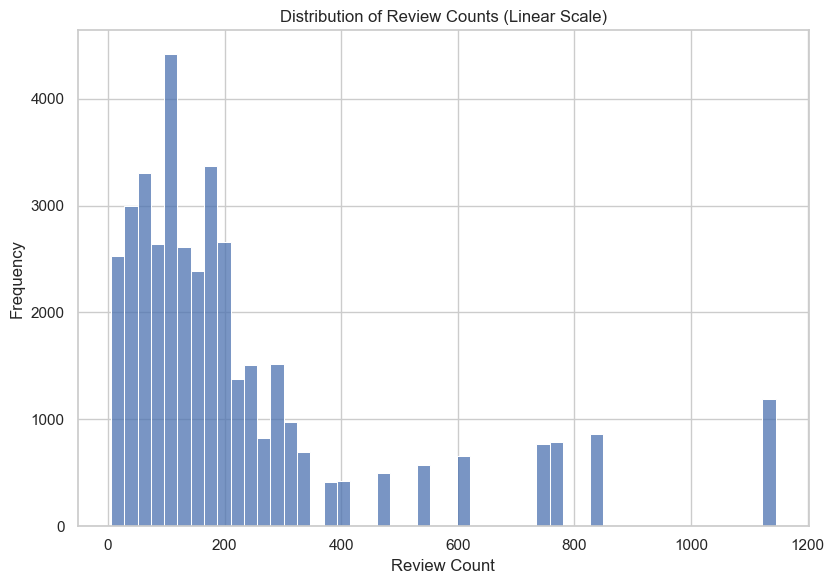

In [95]:
plt.figure(figsize=(16,6))

# ---- Linear Scale ----
plt.subplot(1, 2, 1)
sb.histplot(df_bubble_without_tea['review_count'], bins=50)
plt.title("Distribution of Review Counts (Linear Scale)")
plt.xlabel("Review Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Conclusions

* Most businesses receive only a small number of reviews, while a few accumulate extremely high counts.

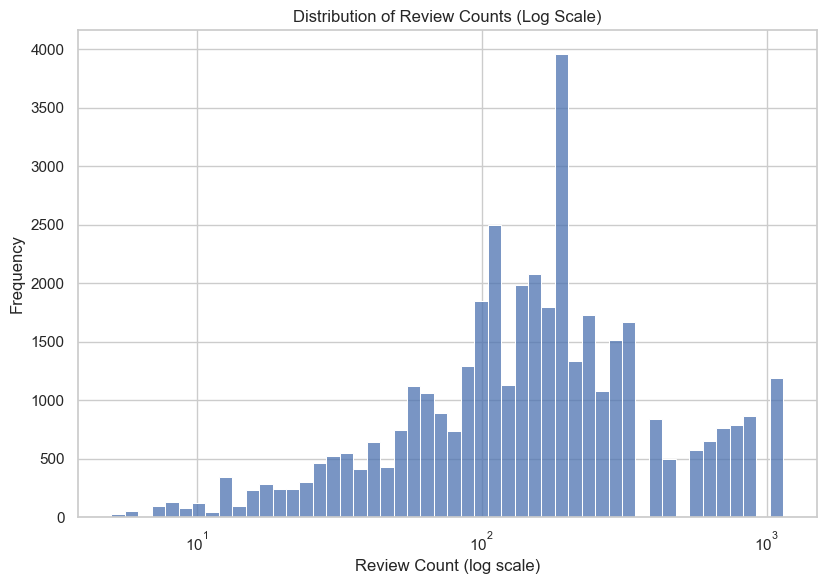

In [96]:
plt.figure(figsize=(16,6))

# ---- Log Scale ----
plt.subplot(1, 2, 2)
sb.histplot(df_bubble_without_tea['review_count'], bins=50, log_scale=True)
plt.title("Distribution of Review Counts (Log Scale)")
plt.xlabel("Review Count (log scale)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Conclusions

* The distribution is heavily right-skewed, with most data clustered on the left. 
* After applying a log scale, the long-tail pattern becomes more evident.
* This shows that the majority of businesses receive fewer than 100 reviews, while a small minority extend into the thousands, forming a classic long-tail distribution.

   - [City / State Comparison Analysis](#City/StateComparisonAnalysis)

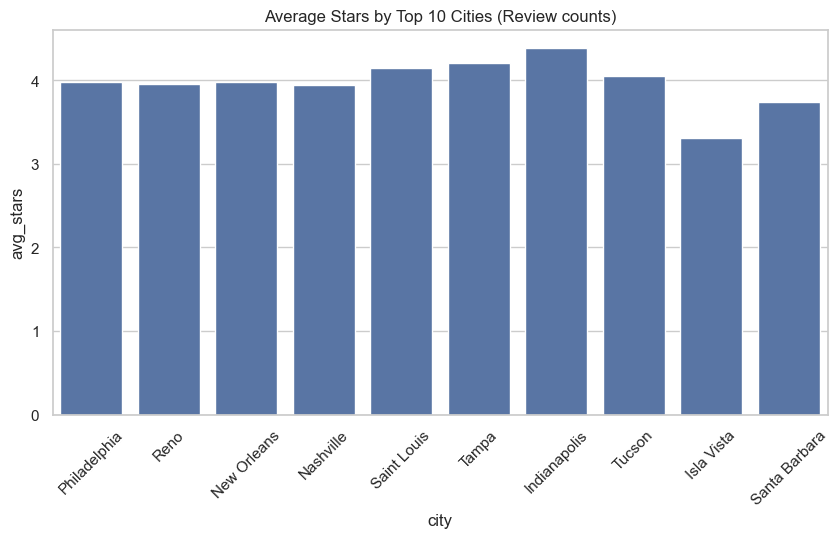

In [97]:
# Average Rating and Review Count by City
city_stats = df_bubble_without_tea.groupby("city").agg(
    avg_stars=("stars_x", "mean"),
    review_count=("review_count", "sum"),
    n_business=("business_id", "count")
).reset_index()

# Top 10 Cities (Ranked by Review Count)
top_cities = city_stats.sort_values("review_count", ascending=False).head(10)

plt.figure(figsize=(10,5))
sb.barplot(data=top_cities, x="city", y="avg_stars")
plt.xticks(rotation=45)
plt.title("Average Stars by Top 10 Cities (Review counts)")
plt.show()


   - [Review Density Heatmap](#ReviewDensityHeatmap)

In [98]:
m = folium.Map(location=[df_bubble_without_tea["latitude"].mean(), df_bubble_without_tea["longitude"].mean()], zoom_start=5)

# Weighted by Review Count (Square Root to Reduce Extreme Influence)
heat_data = df_bubble_without_tea[["latitude", "longitude", "review_count"]].copy()
heat_data["weight"] = np.sqrt(heat_data["review_count"].clip(lower=1))
heat_data = heat_data[["latitude", "longitude", "weight"]].values.tolist()

HeatMap(heat_data, radius=10).add_to(m)

m.save("business_heatmap_with_counts.html")


Conclusions

* Heatmaps reveal strong concentration in California (Los Angeles, San Francisco) and the East Coast (New York, Philadelphia), driven by diverse communities and student populations.

   - [Drop off the city is not in USA](#DropoffthecityisnotinUSA)

Since the Yelp open dataset provides limited coverage in Canada—excluding major cities such as Toronto and Vancouver while only including secondary cities like Edmonton—the results may be misleading. 

To ensure analytical accuracy, Canadian data was excluded, and the study focuses solely on the U.S. market.

In [99]:
#  Unique state list
all_states = df_bubble_without_tea["state"].unique().tolist()
print("Total", len(all_states), "states")
print(all_states)


Total 14 states
['AZ', 'FL', 'NV', 'PA', 'LA', 'CA', 'IN', 'AB', 'DE', 'MO', 'NJ', 'ID', 'TN', 'IL']


In [100]:
df_bubble_usa = df_bubble_without_tea[df_bubble_without_tea["state"] != "AB"]
df_bubble_usa.shape

(39516, 24)

   - [Average star rating and total review count for each city](#Asratrcfec)

In [101]:
# Calculate the average star rating and total review count for each city
city_stats = df_bubble_usa.groupby(["city", "state"]).agg(
    avg_stars=("stars_x", "mean"),
    total_reviews=("review_count", "sum"),
    lat=("latitude", "mean"),
    lon=("longitude", "mean")
).reset_index()

# Create a map
m_city = folium.Map(location=[df_bubble_usa["latitude"].mean(), df_bubble_usa["longitude"].mean()], zoom_start=5)

# Add CircleMarker, where color represents rating and size represents review count
for _, row in city_stats.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=min(row["total_reviews"]**0.5 / 20, 15),  # Radius = square root of review count
        color=None,
        fill=True,
        fill_color="green" if row["avg_stars"] >= 4 else "red",  # Use green if rating > 4 stars, otherwise red
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']}<br>⭐ {row['avg_stars']:.2f}<br>💬 {row['total_reviews']}"
    ).add_to(m_city)

m_city.save("city_avg_stars_map.html")


Conclusions
* The red-green distribution map shows that Los Angeles and New York, despite having many reviews, exhibit more negative ratings—possibly due to high competition and expectations. 
* Meanwhile, midwestern cities (e.g., Saint Louis, Nashville) lean more toward positive ratings, indicating stable satisfaction.

In [102]:
# Calculate the actual number of reviews for each city
city_review_count = (
    df_bubble_usa.groupby(["state", "city"])["review_id"]   # Each row = one review
                  .count()
                  .reset_index()
                  .sort_values("review_id", ascending=False)
)

# Select the Top 5 cities
top5_cities = city_review_count.head(5)
print("📍 Top 5 Cities by Number of Reviews:")
print(top5_cities)


# Expand categories
df_cat = df_bubble_usa.copy()
df_cat["city"]  = df_cat["city"].astype(str).str.strip()
df_cat["state"] = df_cat["state"].astype(str).str.strip()

df_cat["category_list"] = (
    df_cat["categories"]
      .fillna("")
      .astype(str)
      .apply(lambda s: [c.strip() for c in s.split(",") if c.strip()])
)

df_cat = df_cat.explode("category_list").rename(columns={"category_list": "category"})


# Calculate the top categories in the Top 5 cities
top5_results = []

for _, row in top5_cities.iterrows():
    st, city = row["state"], row["city"]
    sub = df_cat[(df_cat["state"] == st) & (df_cat["city"] == city)]
    
    # Use "review_id" to count the actual number of reviews
    cat_counts = (
        sub.groupby("category")["review_id"].count().reset_index(name="cnt")
           .sort_values("cnt", ascending=False).head(5)
    )
    
    for _, r in cat_counts.iterrows():
        top5_results.append({
            "City": city,
            "State": st,
            "Category": r["category"],
            "Review_Count": r["cnt"]
        })

# Organize and output results
df_top5 = pd.DataFrame(top5_results)

print("\n📊 Top 5 Categories in Top 5 Cities:")
print(df_top5)


📍 Top 5 Cities by Number of Reviews:
   state          city  review_id
91    PA  Philadelphia       8681
24    FL         Tampa       2657
69    NV          Reno       2638
38    IN  Indianapolis       2486
0     AZ        Tucson       2260

📊 Top 5 Categories in Top 5 Cities:
            City State                   Category  Review_Count
0   Philadelphia    PA                 Bubble Tea          8681
1   Philadelphia    PA                       Food          8681
2   Philadelphia    PA                Restaurants          5309
3   Philadelphia    PA               Coffee & Tea          3394
4   Philadelphia    PA     Juice Bars & Smoothies          2660
5          Tampa    FL                 Bubble Tea          2657
6          Tampa    FL                       Food          2657
7          Tampa    FL                Restaurants          1881
8          Tampa    FL               Coffee & Tea          1605
9          Tampa    FL     Juice Bars & Smoothies          1332
10          Reno  

Conclusions
* Philadelphia dominates in the East, while cities in the South and West (Tampa, Reno, Tucson) also show strong presence. 
* Each city reflects a unique cultural integration: Reno with Asian cuisine, Indianapolis with desserts, Tucson with coffee and health drinks.

                                           hours_dict  avg_hours  late_night
29  {'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...   9.000000           0
52  {'Monday': '11:0-21:0', 'Wednesday': '11:0-21:...  10.000000           0
53  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...   7.857143           0
56  {'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0...   3.750000           0
67  {'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0...   3.750000           0
72  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  11.285714           1
76  {'Monday': '0:0-0:0', 'Wednesday': '16:30-21:0...   3.750000           0
78  {'Monday': '11:0-21:0', 'Wednesday': '11:0-21:...  10.000000           0
82  {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...  10.333333           0
91  {'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...   9.285714           0


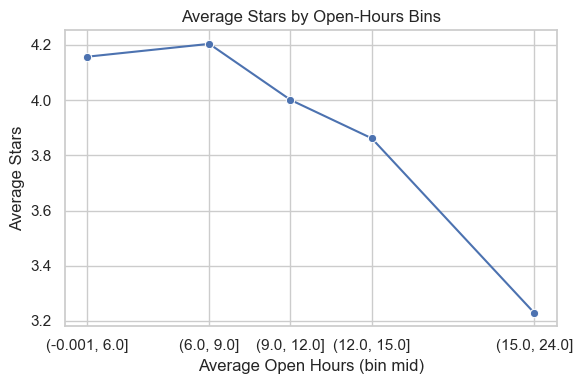

== Late-night summary ==
   late_night  avg_stars  med_stars  avg_hours  n_business  avg_reviews
0           0   4.143317        5.0   8.536803       31713   223.576357
1           1   3.800846        4.0  11.313206        7803   282.708702


In [103]:
sb.set(style="whitegrid")

# --- Helper functions ---
def parse_span_to_hours(span: str) -> float:
    """Convert 'HH:MM-HH:MM' to duration in hours. Handle overnight close."""
    if not isinstance(span, str) or "-" not in span:
        return np.nan
    try:
        open_t, close_t = span.split("-")

        def to_float_hhmm(s):
            hh, mm = s.split(":")
            return int(hh) + int(mm)/60.0

        oh = to_float_hhmm(open_t)
        ch = to_float_hhmm(close_t)
        dur = ch - oh
        if dur < 0:  # overnight
            dur += 24.0
        return dur
    except Exception:
        return np.nan

def compute_avg_hours(hours_obj: dict) -> float:
    """Compute average open hours per day from hours_dict."""
    if not isinstance(hours_obj, dict) or len(hours_obj) == 0:
        return np.nan
    durations = [parse_span_to_hours(span) for span in hours_obj.values()]
    durations = [d for d in durations if pd.notna(d)]
    if len(durations) == 0:
        return np.nan
    return float(np.mean(durations))

def has_late_night(hours_obj: dict, threshold_hour=23) -> int:
    """Return 1 if business closes at/after threshold_hour on any day (or crosses midnight)."""
    if not isinstance(hours_obj, dict) or len(hours_obj) == 0:
        return 0
    for span in hours_obj.values():
        if not isinstance(span, str) or "-" not in span:
            continue
        try:
            open_t, close_t = span.split("-")
            oh = int(open_t.split(":")[0])
            ch = int(close_t.split(":")[0])
            overnight = (ch < oh)  # crossed midnight
            if ch >= threshold_hour or overnight:
                return 1
        except Exception:
            continue
    return 0

# --- Feature engineering on hours_dict ---
df_hours = df_bubble_usa.copy()
df_hours["avg_hours"] = df_hours["hours_dict"].apply(compute_avg_hours)
df_hours["late_night"] = df_hours["hours_dict"].apply(has_late_night)

print(df_hours[["hours_dict", "avg_hours", "late_night"]].head(10))

# --- Binned trend (avg_hours grouped) ---
valid = df_hours.dropna(subset=["avg_hours", "stars_x"]).copy()
valid["hours_bin"] = pd.cut(valid["avg_hours"], bins=[0,6,9,12,15,24], include_lowest=True)

trend = (
    valid.groupby("hours_bin", observed=True)
         .agg(avg_stars=("stars_x", "mean"), n=("stars_x", "size"))
         .reset_index()
)

# Use bin midpoints for a sortable numeric x-axis
trend["bin_mid"] = trend["hours_bin"].apply(lambda iv: (iv.left + iv.right) / 2.0)
trend = trend.sort_values("bin_mid")

plt.figure(figsize=(6,4))
ax = sb.lineplot(data=trend, x="bin_mid", y="avg_stars", marker="o")
ax.set_title("Average Stars by Open-Hours Bins")
ax.set_xlabel("Average Open Hours (bin mid)")
ax.set_ylabel("Average Stars")
# Show original interval labels on the x-axis for clarity
ax.set_xticks(trend["bin_mid"])
ax.set_xticklabels(trend["hours_bin"].astype(str), rotation=0)
plt.tight_layout()
plt.show()

# --- Summary table (keep) ---
summary_hours = (
    df_hours.groupby("late_night", dropna=False)
            .agg(
                avg_stars=("stars_x", "mean"),
                med_stars=("stars_x", "median"),
                avg_hours=("avg_hours", "mean"),
                n_business=("late_night", "size"),
                avg_reviews=("review_count", "mean")
            )
            .reset_index()
)
print("== Late-night summary ==")
print(summary_hours)


== Top categories by # of late-night businesses (close later than 21:00) ==
                    categories  late_n_business  total_business  \
16                  Bubble Tea              242             449   
39                        Food              242             449   
78                 Restaurants              147             261   
27                Coffee & Tea               96             174   
59      Juice Bars & Smoothies               69             142   
54   Ice Cream & Frozen Yogurt               36              61   
8                 Asian Fusion               34              53   
31                    Desserts               34              58   
105                 Vietnamese               32              73   
25                     Chinese               28              35   
57                    Japanese               27              41   
93                  Sushi Bars               21              31   
18                       Cafes               21      

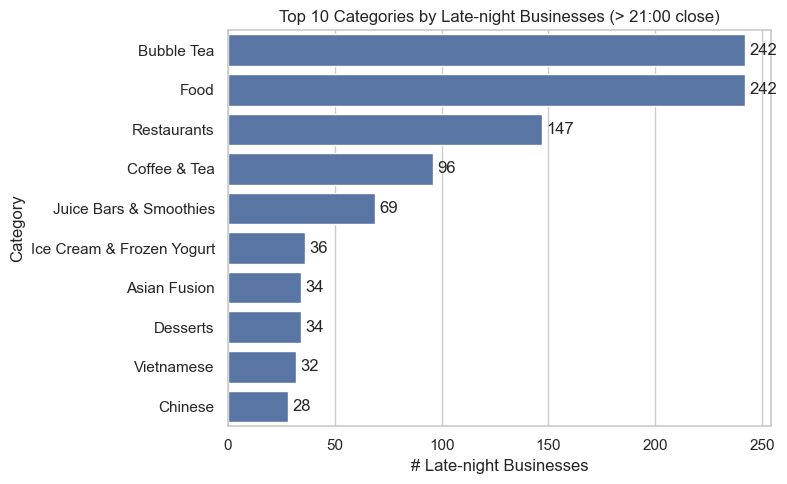

In [104]:
sb.set(style="whitegrid")

# === Late-night rule: closes strictly later than 21:00; overnight and 24h count as late ===
def _parse_hm(s: str):
    h, m = s.split(":")
    return int(h), int(m)

def is_late_night_after_21(hours_obj: dict, threshold_hour=21, threshold_minute=0) -> int:
    """
    Return 1 if any day closes later than 21:00 (strict), crosses midnight, or is 24h.
    """
    if not isinstance(hours_obj, dict) or len(hours_obj) == 0:
        return 0
    for span in hours_obj.values():
        if not isinstance(span, str) or "-" not in span:
            continue
        s = span.replace(" ", "")
        # 24h patterns
        if s in {"0:0-0:0", "00:00-00:00", "0:00-0:00", "00:0-00:0"}:
            return 1
        try:
            open_t, close_t = span.split("-")
            oh, om = _parse_hm(open_t)
            ch, cm = _parse_hm(close_t)
            # overnight (e.g., 18:00-02:00)
            if (ch < oh) or (ch == oh and cm < om):
                return 1
            # strictly later than 21:00
            if (ch > threshold_hour) or (ch == threshold_hour and cm > threshold_minute):
                return 1
        except Exception:
            continue
    return 0

# --- Compute/overwrite late_night from hours_dict ---
df_bubble_usa = df_bubble_usa.copy()
df_bubble_usa["late_night"] = df_bubble_usa["hours_dict"].apply(is_late_night_after_21)

# --- One row per business (avoid double counting), keep needed cols ---
df_unique = (
    df_bubble_usa[["business_id", "categories", "review_count", "late_night"]]
    .drop_duplicates(subset=["business_id"])
    .copy()
)
df_unique["review_count"] = pd.to_numeric(df_unique["review_count"], errors="coerce")

# --- Expand multi-label categories ---
df_cat = df_unique.assign(categories=df_unique["categories"].astype(str).str.split(","))
df_cat = df_cat.explode("categories")
df_cat["categories"] = df_cat["categories"].astype(str).str.strip()
df_cat = df_cat[df_cat["categories"].str.len() > 0]

# --- Aggregate: late-night businesses per category (and totals for filtering/context) ---
late = df_cat[df_cat["late_night"] == 1]
late_agg = (
    late.groupby("categories", as_index=False)
        .agg(late_n_business=("business_id", "nunique"),
             late_total_reviews=("review_count", "sum"))
)
all_agg = (
    df_cat.groupby("categories", as_index=False)
          .agg(total_business=("business_id", "nunique"),
               total_reviews=("review_count", "sum"))
)

# Keep categories that have at least 'min_business' total businesses
cat_late = late_agg.merge(all_agg, on="categories", how="left").fillna(0)
min_business = 10
cat_late_f = cat_late[cat_late["total_business"] >= min_business].copy()

# --- TopN by count of late-night businesses ---
topN = 15
top_counts = (
    cat_late_f.sort_values(["late_n_business", "late_total_reviews"], ascending=False)
              .head(topN)[["categories", "late_n_business", "total_business", "late_total_reviews"]]
)

print("== Top categories by # of late-night businesses (close later than 21:00) ==")
print(top_counts)

# --- Plot (only the count-based chart) ---
plot1 = top_counts.head(10)
plt.figure(figsize=(8,5))
ax = sb.barplot(data=plot1, y="categories", x="late_n_business")
ax.set_title("Top 10 Categories by Late-night Businesses (> 21:00 close)")
ax.set_xlabel("# Late-night Businesses")
ax.set_ylabel("Category")

# Optional: add value labels
for p in ax.patches:
    x = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(x + 2, y, f"{int(x)}", va="center")

plt.tight_layout()
plt.show()


Conclusions
* Longer hours correlate with lower ratings. Avg stars peak at 6–9h (~4.2★), then fall to ~3.2★ when open >15h.
* Since ratings drop after ~9h, bolster night-shift staffing, consistency, and wait-time control.

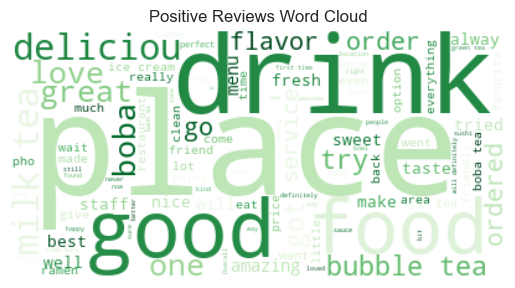

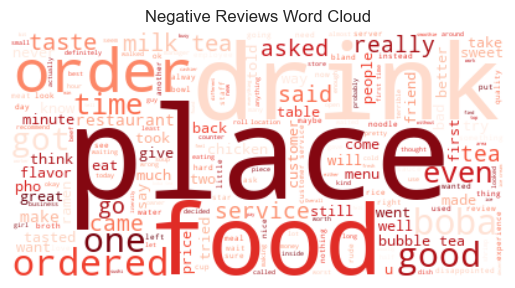

In [105]:
# Define positive and negative reviews 
positive_reviews = " ".join(df_bubble_usa[df_bubble_usa['stars_x'] >= 4]['text'])
negative_reviews = " ".join(df_bubble_usa[df_bubble_usa['stars_x'] <= 2]['text'])

# Define stopwords (to remove common words like 'like', 'the', 'and')
stopwords = set(STOPWORDS)

# Generate WordCloud for Positive Reviews
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", colormap="Greens").generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()

# Generate WordCloud for Negative Reviews
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white", colormap="Reds").generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()


           bubble      boba   tapioca       tea      milk   topping     sweet  \
stars_x                                                                         
1        0.103516  0.196188  0.019389  0.347026  0.131778  0.021689  0.082156   
2        0.135559  0.257039  0.035398  0.422767  0.183829  0.043041  0.155672   
3        0.165486  0.262399  0.034160  0.451670  0.204200  0.060476  0.176872   
4        0.185519  0.274830  0.038260  0.484040  0.216884  0.075409  0.193861   
5        0.147786  0.258411  0.026468  0.427485  0.175157  0.053935  0.149211   

              ice     price   service     chewy      soft   texture     fresh  \
stars_x                                                                         
1        0.510352  0.097272  0.264542  0.022018  0.013802  0.017417  0.045679   
2        0.597345  0.160901  0.256637  0.041432  0.040225  0.045052  0.082864   
3        0.650304  0.188259  0.251012  0.047065  0.044534  0.048330  0.115385   
4        0.635080  0.172172

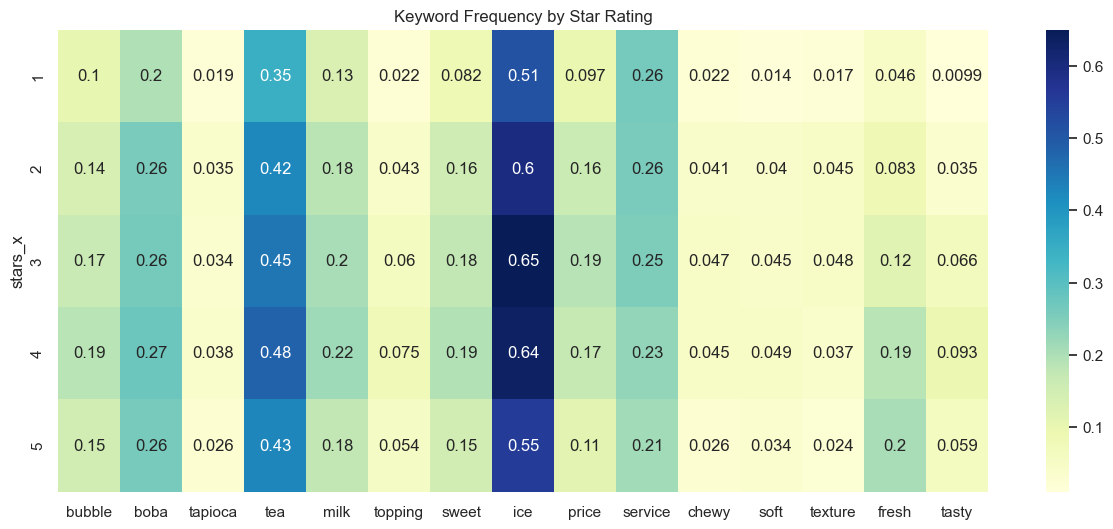

In [106]:
# Define keywords
keywords = ["bubble", "boba", "tapioca", "tea", "milk", "topping", "sweet", "ice", "price", "service", "chewy", "soft", "texture", "fresh", "tasty"]

# Create new columns for keyword presence 
for kw in keywords:
    df_bubble_usa[kw] = df_bubble_usa['text'].str.contains(kw, case=False, na=False).astype(int)

# Group by star rating and calculate keyword frequency
keyword_stats = df_bubble_usa.groupby('stars_x')[keywords].mean()
print(keyword_stats)

# Visualization: Heatmap
plt.figure(figsize=(15,6))
sb.heatmap(keyword_stats, annot=True, cmap="YlGnBu")
plt.title("Keyword Frequency by Star Rating")
plt.show()


Conclusions

* Positive reviews emphasize good food, friendly service, and overall experience. 
* Negative reviews highlight ordering issues, poor service, and food delivery problems. 
* From the keyword analysis, bubble tea–related words (bubble, boba, tapioca) are linked to higher ratings, while price and service complaints are strongly tied to lower ratings.

                                    name  avg_stars  review_count
145                          Kung Fu Tea   3.873065          1292
2                  101 Taiwanese Cuisine   4.012626          1188
306                               Tea Do   3.952017           917
180                                Mopho   3.948101           790
209                          Otaku Ramen   3.677546           766
68                             Corner 17   4.203053           655
112                         Hana Kitchen   3.086522           601
49                            Bubblefish   4.036649           573
184                              Mr Wish   4.287908           521
363                      Yamitsuki Ramen   3.760081           496
171  Mint Modern Vietnamese Bistro & Bar   4.071090           422
27                       Bing's Boba Tea   3.950000           420
108               Green Mint Asian Grill   4.162679           418
164                     Main Street Poké   4.364407           354
310       

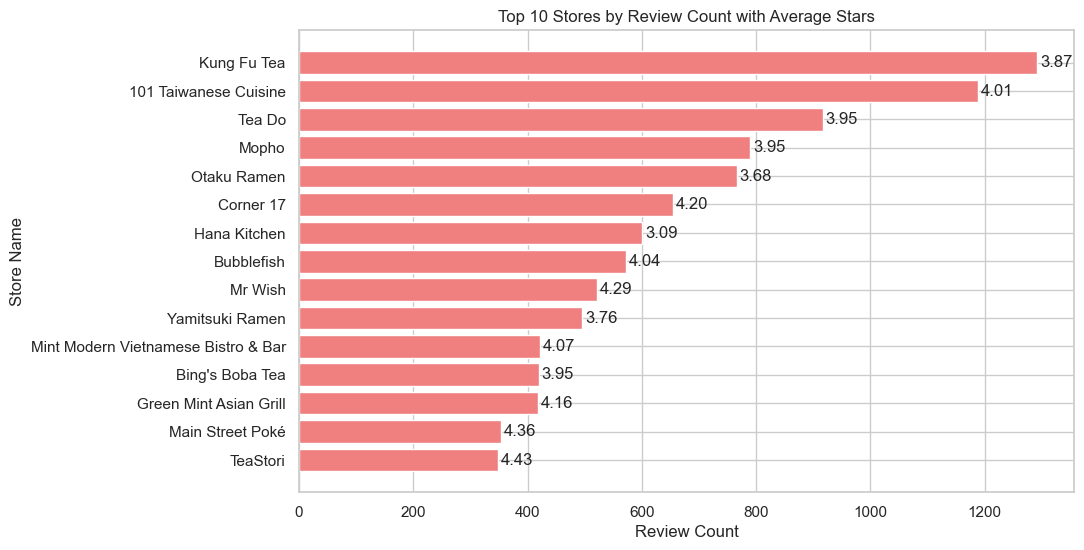

In [107]:
# Calculate avg stars & review count
store_ratings = (
    df_bubble_usa.groupby('name')
    .agg(avg_stars=('stars_x', 'mean'),
         review_count=('stars_x', 'count'))
    .reset_index()
)

# Sort by review_count, pick top 10
top10_by_reviews = (
    store_ratings
    .sort_values('review_count', ascending=False)
    .head(15)
)

print(top10_by_reviews)

# Bar chart for top 10 by review count
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_by_reviews['name'], top10_by_reviews['review_count'], color='lightcoral')

# Label avg stars on the bars
for bar, avg in zip(bars, top10_by_reviews['avg_stars']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f"{avg:.2f}", va='center')

plt.xlabel("Review Count")
plt.ylabel("Store Name")
plt.title("Top 10 Stores by Review Count with Average Stars")
plt.gca().invert_yaxis()
plt.show()



Top stores by review count:
                                   name  avg_stars  review_count
0                           Kung Fu Tea   3.873065          1292
1                 101 Taiwanese Cuisine   4.012626          1188
2                                Tea Do   3.952017           917
3                                 Mopho   3.948101           790
4                           Otaku Ramen   3.677546           766
5                             Corner 17   4.203053           655
6                          Hana Kitchen   3.086522           601
7                            Bubblefish   4.036649           573
8                               Mr Wish   4.287908           521
9                       Yamitsuki Ramen   3.760081           496
10  Mint Modern Vietnamese Bistro & Bar   4.071090           422
11                      Bing's Boba Tea   3.950000           420
12               Green Mint Asian Grill   4.162679           418
13                     Main Street Poké   4.364407           

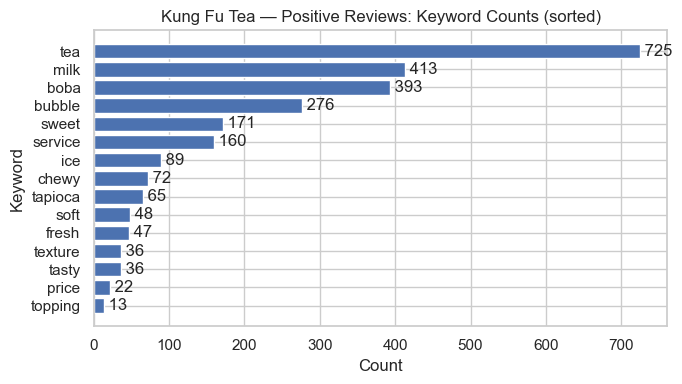

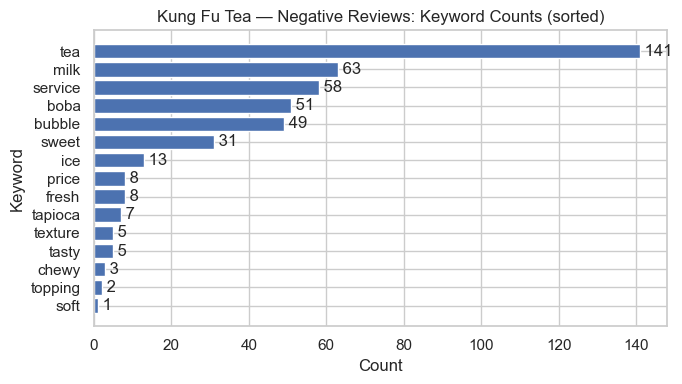

In [108]:
# Functions
def contains_kw(series: pd.Series, kw: str) -> pd.Series:
    """
    Return a boolean Series indicating whether each row in `series`
    contains the keyword `kw` as a standalone word (case-insensitive).
    """
    pattern = re.compile(rf"\b{re.escape(kw)}\b", flags=re.IGNORECASE)
    return series.str.contains(pattern, na=False)

def build_kw_table(df_part: pd.DataFrame, keywords: list[str]) -> tuple[int, pd.DataFrame]:
    """
    Build a keyword table for a subset of reviews.
    Returns (total_reviews, DataFrame[count, ratio] indexed by keyword).
    """
    total = len(df_part)
    rows = []
    text_series = df_part["text"].astype(str)
    for kw in keywords:
        cnt = int(contains_kw(text_series, kw).sum())
        ratio = round(cnt / total, 3) if total > 0 else 0.0
        rows.append((kw, cnt, ratio))
    out = pd.DataFrame(rows, columns=["keyword", "count", "ratio"]).set_index("keyword")
    return total, out

def plot_sorted_counts(df_counts: pd.DataFrame, title: str, top_n: int = 15) -> None:
    """
    Plot a horizontal bar chart of keyword counts sorted by `count`.
    Shows up to `top_n` keywords and drops zero-count rows for clarity.
    """
    df_plot = df_counts[df_counts["count"] > 0].sort_values("count", ascending=False).tail(top_n)
    plt.figure(figsize=(7, 4))
    plt.barh(df_plot.index, df_plot["count"])
    # Add value labels
    for y, v in enumerate(df_plot["count"].values):
        plt.text(v, y, f" {v}", va="center")
    plt.title(title)
    plt.xlabel("Count")
    plt.ylabel("Keyword")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Aggregate per-store stats
store_ratings = (
    df_bubble_usa.groupby("name")
    .agg(avg_stars=("stars_x", "mean"),
         review_count=("stars_x", "count"))
    .reset_index()
)

# Sort by review count and take Top-10
top_by_reviews = (
    store_ratings.sort_values("review_count", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

print("\nTop stores by review count:")
print(top_by_reviews)

# Pick one store to analyze
store_name = top_by_reviews.iloc[0]["name"]
print(f"\nAnalyzing store: {store_name}")

# Filter this store's reviews and split by sentiment
df_store = df_bubble_usa.loc[df_bubble_usa["name"] == store_name].copy()
df_store["text"] = df_store["text"].astype(str)

pos_df = df_store[df_store["stars_x"] >= 4].copy()
neg_df = df_store[df_store["stars_x"] <= 2].copy()

print(f"Total reviews: {len(df_store)} | Positive: {len(pos_df)} | Negative: {len(neg_df)}")

# Build keyword tables (Positive / Negative)
pos_total, pos_kw = build_kw_table(pos_df, keywords)
neg_total, neg_kw = build_kw_table(neg_df, keywords)

print("\n[Positive] sorted by count (desc):")
print(pos_kw.sort_values("count", ascending=False).head(15))

print("\n[Negative] sorted by count (desc):")
print(neg_kw.sort_values("count", ascending=False).head(15))

# Plots (sorted bar charts)
plot_sorted_counts(pos_kw, f"{store_name} — Positive Reviews: Keyword Counts (sorted)", top_n=15)
plot_sorted_counts(neg_kw, f"{store_name} — Negative Reviews: Keyword Counts (sorted)", top_n=15)




Analyzing store: Tea Do
Total reviews: 917 | Positive: 673 | Negative: 101

[Positive] sorted by count (desc):
         count  ratio
keyword              
tea        568  0.844
bubble     352  0.523
milk       251  0.373
boba       185  0.275
sweet      151  0.224
service    103  0.153
tapioca     61  0.091
ice         51  0.076
chewy       49  0.073
fresh       43  0.064
soft        29  0.043
price       28  0.042
tasty       26  0.039
texture     13  0.019
topping      7  0.010

[Negative] sorted by count (desc):
         count  ratio
keyword              
tea         81  0.802
milk        41  0.406
bubble      33  0.327
service     24  0.238
sweet       22  0.218
boba        20  0.198
tapioca      8  0.079
ice          5  0.050
chewy        5  0.050
fresh        3  0.030
texture      2  0.020
topping      1  0.010
price        1  0.010
soft         1  0.010
tasty        0  0.000


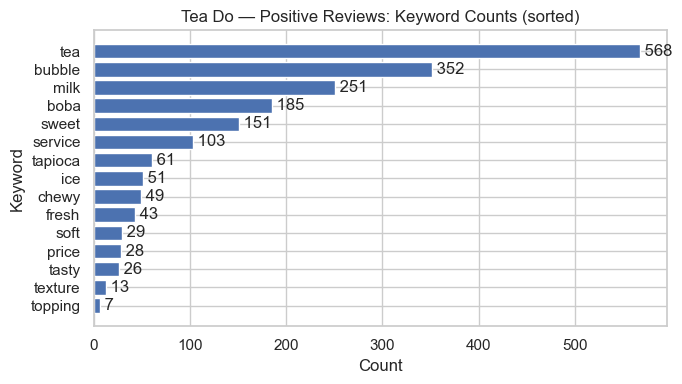

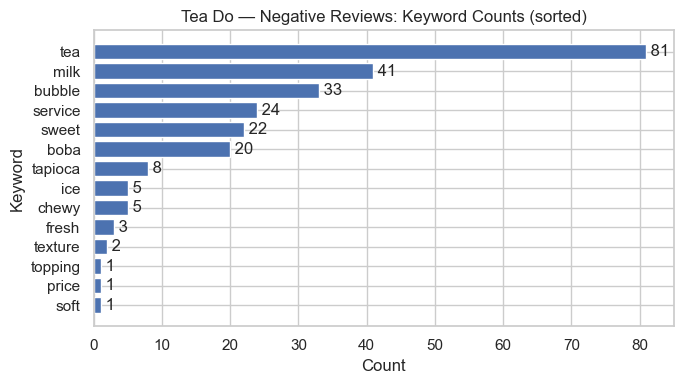

In [109]:
# Pick one store to analyze
store_name = top_by_reviews.iloc[2]["name"]
print(f"\nAnalyzing store: {store_name}")

# Filter this store's reviews and split by sentiment
df_store = df_bubble_usa.loc[df_bubble_usa["name"] == store_name].copy()
df_store["text"] = df_store["text"].astype(str)

pos_df = df_store[df_store["stars_x"] >= 4].copy()
neg_df = df_store[df_store["stars_x"] <= 2].copy()

print(f"Total reviews: {len(df_store)} | Positive: {len(pos_df)} | Negative: {len(neg_df)}")

# Build keyword tables (Positive / Negative)
pos_total, pos_kw = build_kw_table(pos_df, keywords)
neg_total, neg_kw = build_kw_table(neg_df, keywords)

print("\n[Positive] sorted by count (desc):")
print(pos_kw.sort_values("count", ascending=False).head(15))

print("\n[Negative] sorted by count (desc):")
print(neg_kw.sort_values("count", ascending=False).head(15))

# Plots (sorted bar charts)
plot_sorted_counts(pos_kw, f"{store_name} — Positive Reviews: Keyword Counts (sorted)", top_n=15)
plot_sorted_counts(neg_kw, f"{store_name} — Negative Reviews: Keyword Counts (sorted)", top_n=15)


Analyzing store: Mopho
Total reviews: 790 | Positive: 554 | Negative: 119

[Positive] sorted by count (desc):
         count  ratio
keyword              
service    144  0.260
fresh       61  0.110
tasty       60  0.108
sweet       59  0.106
tea         40  0.072
boba        37  0.067
ice         25  0.045
price       24  0.043
bubble      20  0.036
milk        15  0.027
texture     10  0.018
soft         7  0.013
chewy        6  0.011
tapioca      4  0.007
topping      1  0.002

[Negative] sorted by count (desc):
         count  ratio
keyword              
service     34  0.286
price       13  0.109
sweet       10  0.084
tasty        9  0.076
boba         7  0.059
tea          7  0.059
fresh        6  0.050
bubble       4  0.034
chewy        2  0.017
texture      2  0.017
milk         1  0.008
topping      1  0.008
soft         1  0.008
tapioca      0  0.000
ice          0  0.000


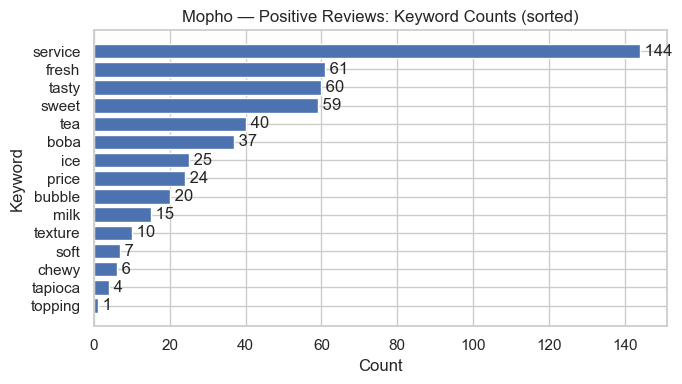

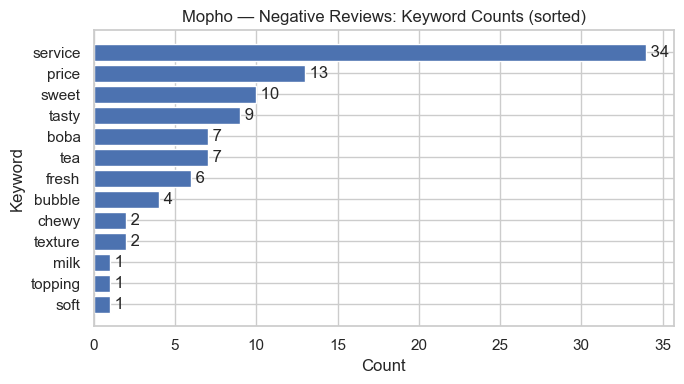

In [110]:
# Pick one store to analyze
store_name = top_by_reviews.iloc[3]["name"]
print(f"\nAnalyzing store: {store_name}")

# Filter this store's reviews and split by sentiment
df_store = df_bubble_usa.loc[df_bubble_usa["name"] == store_name].copy()
df_store["text"] = df_store["text"].astype(str)

pos_df = df_store[df_store["stars_x"] >= 4].copy()
neg_df = df_store[df_store["stars_x"] <= 2].copy()

print(f"Total reviews: {len(df_store)} | Positive: {len(pos_df)} | Negative: {len(neg_df)}")

# Build keyword tables (Positive / Negative)
pos_total, pos_kw = build_kw_table(pos_df, keywords)
neg_total, neg_kw = build_kw_table(neg_df, keywords)

print("\n[Positive] sorted by count (desc):")
print(pos_kw.sort_values("count", ascending=False).head(15))

print("\n[Negative] sorted by count (desc):")
print(neg_kw.sort_values("count", ascending=False).head(15))

# Plots (sorted bar charts)
plot_sorted_counts(pos_kw, f"{store_name} — Positive Reviews: Keyword Counts (sorted)", top_n=15)
plot_sorted_counts(neg_kw, f"{store_name} — Negative Reviews: Keyword Counts (sorted)", top_n=15)


Analyzing store: Mr Wish
Total reviews: 521 | Positive: 434 | Negative: 49

[Positive] sorted by count (desc):
         count  ratio
keyword              
tea        342  0.788
milk       171  0.394
bubble     155  0.357
fresh      125  0.288
boba       124  0.286
sweet       85  0.196
service     55  0.127
soft        37  0.085
ice         35  0.081
chewy       33  0.076
texture     25  0.058
tapioca     24  0.055
tasty       17  0.039
price       13  0.030
topping      2  0.005

[Negative] sorted by count (desc):
         count  ratio
keyword              
tea         33  0.673
milk        16  0.327
bubble      13  0.265
service     13  0.265
boba        12  0.245
sweet        5  0.102
ice          5  0.102
soft         5  0.102
tapioca      4  0.082
fresh        3  0.061
price        1  0.020
chewy        1  0.020
topping      0  0.000
texture      0  0.000
tasty        0  0.000


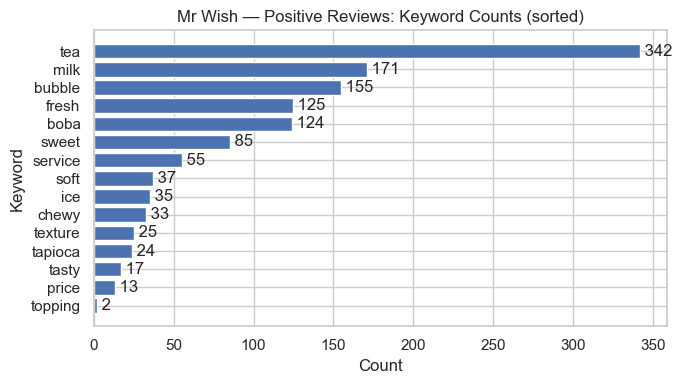

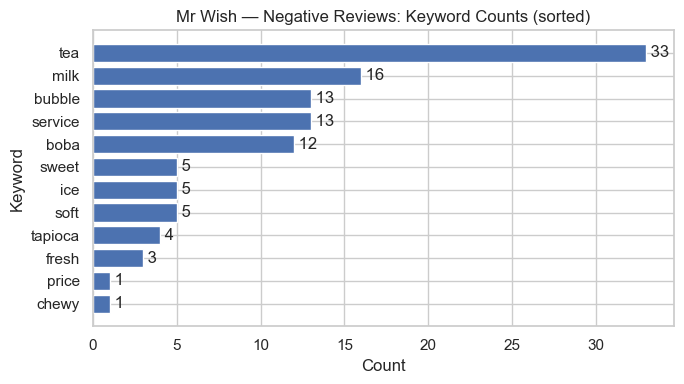

In [111]:
# Pick one store to analyze
store_name = top_by_reviews.iloc[8]["name"]
print(f"\nAnalyzing store: {store_name}")

# Filter this store's reviews and split by sentiment
df_store = df_bubble_usa.loc[df_bubble_usa["name"] == store_name].copy()
df_store["text"] = df_store["text"].astype(str)

pos_df = df_store[df_store["stars_x"] >= 4].copy()
neg_df = df_store[df_store["stars_x"] <= 2].copy()

print(f"Total reviews: {len(df_store)} | Positive: {len(pos_df)} | Negative: {len(neg_df)}")

# Build keyword tables (Positive / Negative)
pos_total, pos_kw = build_kw_table(pos_df, keywords)
neg_total, neg_kw = build_kw_table(neg_df, keywords)

print("\n[Positive] sorted by count (desc):")
print(pos_kw.sort_values("count", ascending=False).head(15))

print("\n[Negative] sorted by count (desc):")
print(neg_kw.sort_values("count", ascending=False).head(15))

# Plots (sorted bar charts)
plot_sorted_counts(pos_kw, f"{store_name} — Positive Reviews: Keyword Counts (sorted)", top_n=15)
plot_sorted_counts(neg_kw, f"{store_name} — Negative Reviews: Keyword Counts (sorted)", top_n=15)


Analyzing store: Bing's Boba Tea
Total reviews: 420 | Positive: 306 | Negative: 66

[Positive] sorted by count (desc):
         count  ratio
keyword              
boba       243  0.794
tea        179  0.585
milk       117  0.382
service     64  0.209
sweet       54  0.176
ice         27  0.088
tapioca     26  0.085
price       18  0.059
tasty       18  0.059
chewy       15  0.049
bubble      12  0.039
soft        12  0.039
texture     12  0.039
fresh       11  0.036
topping      1  0.003

[Negative] sorted by count (desc):
         count  ratio
keyword              
boba        40  0.606
tea         32  0.485
milk        22  0.333
service     19  0.288
sweet       13  0.197
chewy        8  0.121
ice          6  0.091
fresh        5  0.076
bubble       4  0.061
tapioca      3  0.045
soft         3  0.045
texture      3  0.045
tasty        1  0.015
topping      0  0.000
price        0  0.000


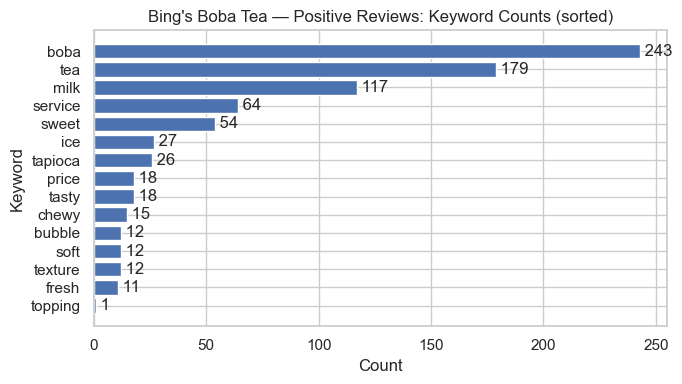

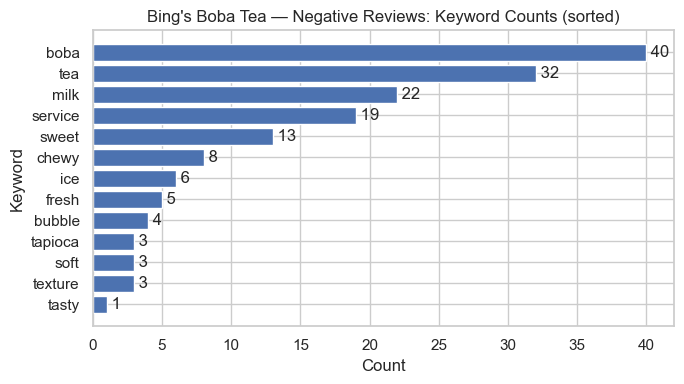

In [112]:
# Pick one store to analyze
store_name = top_by_reviews.iloc[11]["name"]
print(f"\nAnalyzing store: {store_name}")

# Filter this store's reviews and split by sentiment
df_store = df_bubble_usa.loc[df_bubble_usa["name"] == store_name].copy()
df_store["text"] = df_store["text"].astype(str)

pos_df = df_store[df_store["stars_x"] >= 4].copy()
neg_df = df_store[df_store["stars_x"] <= 2].copy()

print(f"Total reviews: {len(df_store)} | Positive: {len(pos_df)} | Negative: {len(neg_df)}")

# Build keyword tables (Positive / Negative)
pos_total, pos_kw = build_kw_table(pos_df, keywords)
neg_total, neg_kw = build_kw_table(neg_df, keywords)

print("\n[Positive] sorted by count (desc):")
print(pos_kw.sort_values("count", ascending=False).head(15))

print("\n[Negative] sorted by count (desc):")
print(neg_kw.sort_values("count", ascending=False).head(15))

# Plots (sorted bar charts)
plot_sorted_counts(pos_kw, f"{store_name} — Positive Reviews: Keyword Counts (sorted)", top_n=15)
plot_sorted_counts(neg_kw, f"{store_name} — Negative Reviews: Keyword Counts (sorted)", top_n=15)

Conclusions

* “Tea” and “milk” are baseline drink terms with low discriminative power (high in both positives and negatives).

* “Boba/bubble” skew positive, notably for Tea Do and Bing’s Boba Tea, indicating the core product drives satisfaction.

* “Service” is a key pain point in negatives across brands; for Mopho, “service” is high even in positives—suggesting polarized experiences and high impact.

* “Price” is more negative-leaning, often ranking high in low-star reviews (e.g., Mopho).

* Texture terms (chewy/tapioca/texture) skew positive, highlighting tapioca chewiness as a differentiator.

* “Ice/sweet” matter, but their impact is smaller than service and price.

Average stars by season：
        avg_stars  median_stars      n
season                                
Winter      4.064           5.0   9588
Spring      4.099           5.0   9369
Summer      4.080           5.0  11067
Autumn      4.060           5.0   9492


C:\Users\User\AppData\Local\Temp\ipykernel_17540\2932024986.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sb.barplot(data=df, x="season", y="stars_x",


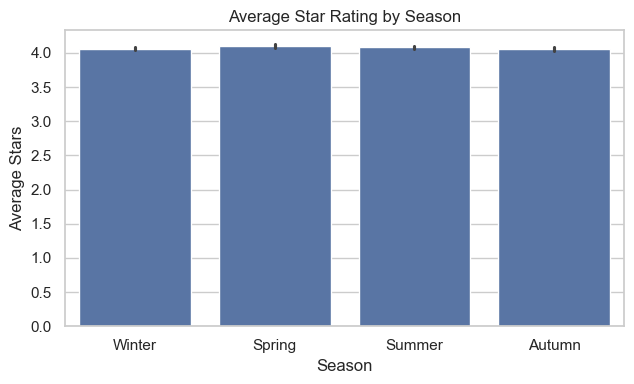


Year × Season average stars
season  Winter  Spring  Summer  Autumn
year                                  
2007     3.500   3.000   3.800   3.250
2008     3.250   3.538   3.438   3.700
2009     4.045   4.000   4.517   3.947
2010     3.806   3.600   3.410   3.913
2011     3.804   3.983   3.833   3.936
2012     3.794   3.868   3.858   3.897
2013     3.780   3.767   3.767   3.886
2014     3.838   3.976   4.091   3.900
2015     3.884   3.993   4.064   4.006
2016     4.081   4.030   4.077   4.001
2017     4.088   4.099   3.973   4.094
2018     4.048   4.060   4.148   4.123
2019     4.102   4.129   4.098   4.033
2020     4.109   4.327   4.179   4.194
2021     4.170   4.182   4.096   4.062
2022     4.097     NaN     NaN     NaN


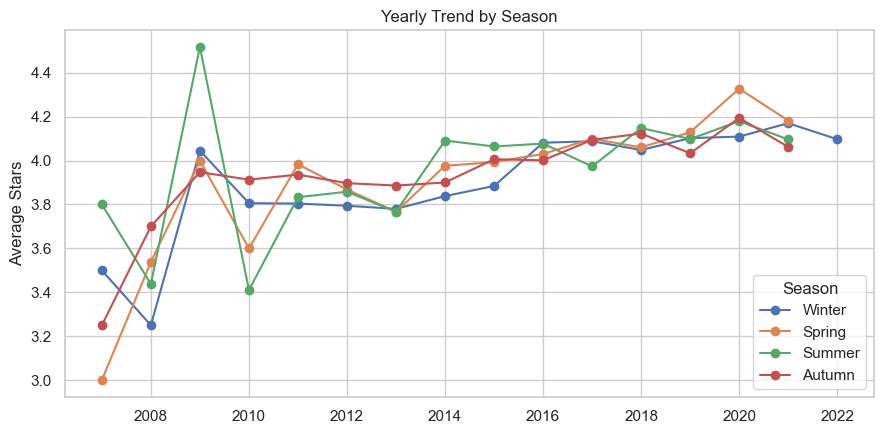


Kruskal-Wallis across seasons: H=6.185, p=0.103
p < 0.05 → The star-rating distributions differ significantly across seasons.p ≥ 0.05 → The difference is not statistically significant.


In [113]:
# Average Star by Season
sb.set(style="whitegrid")

# Parse date & keep valid rows
df = df_bubble_usa.copy()
df["date_dt"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date_dt", "stars_x"])

# Map month -> season (USA) 
def month_to_season(m):
    if m in (12, 1, 2):  return "Winter" 
    if m in (3, 4, 5):   return "Spring" 
    if m in (6, 7, 8):   return "Summer"
    return "Autumn"

df["season"] = df["date_dt"].dt.month.map(month_to_season)
season_order = ["Winter", "Spring", "Summer", "Autumn"]

# Summary table
season_stats = (
    df.groupby("season", observed=False)
      .agg(avg_stars=("stars_x", "mean"),
           median_stars=("stars_x", "median"),
           n=("stars_x", "size"))
      .reindex(season_order)
      .round(3)
)
print("Average stars by season：")
print(season_stats)

# Bar chart with 95% CI
plt.figure(figsize=(6.5, 4))
sb.barplot(data=df, x="season", y="stars_x",
           order=season_order, estimator=np.mean, ci=95)
plt.xlabel("Season")
plt.ylabel("Average Stars")
plt.title("Average Star Rating by Season")
plt.tight_layout(); plt.show()

# Year × Season trend
df["year"] = df["date_dt"].dt.year
pivot = (
    df.groupby(["year", "season"], observed=False)["stars_x"]
      .mean()
      .unstack("season")
      .reindex(columns=season_order)
      .round(3)
)
print("\nYear × Season average stars")
print(pivot)

plt.figure(figsize=(9, 4.5))
for s in season_order:
    if s in pivot:
        plt.plot(pivot.index, pivot[s], marker="o", label=s)
plt.legend(title="Season")
plt.ylabel("Average Stars")
plt.title("Yearly Trend by Season")
plt.tight_layout(); plt.show()

# Significance test across seasons
groups = [df.loc[df["season"] == s, "stars_x"].values for s in season_order]
H, p = kruskal(*groups) 
print(f"\nKruskal-Wallis across seasons: H={H:.3f}, p={p:.4g}")
print("p < 0.05 → The star-rating distributions differ significantly across seasons." \
"p ≥ 0.05 → The difference is not statistically significant.")


Conclusions

* Seasonal differences are minimal.
All four seasons sit around ~4.06–4.10. Spring is marginally higher and Autumn marginally lower, but the gap is only ~0.03–0.04.

* Long-term upward drift
The year-by-season lines show a general upward trend over time.

* Rank is consistent but effect is tiny
Roughly Spring≈Summer ≥ Winter≈Autumn, yet the lines are close—no strong seasonal pattern.


In [114]:
# df_bubble_usa.head(5)

In [115]:
# import plotly.express as px

# fig = px.scatter_geo(
#     df_food,
#     lat="latitude",
#     lon="longitude",
#     text="name",
#     hover_name="city",
#     scope="world",   # 可以換成 "usa" 聚焦美國
#     title="Bubble Tea Shops on Yelp"
# )
# fig.show()


In [116]:
# business_path = "yelp_academic_dataset_business.json"
# review_path = "yelp_academic_dataset_review.json"
# out_csv  = "food_reviews.csv"

# # 1) 先讀 business（這個檔相對小），找出餐飲/飲料相關的 business_id
# business = pd.read_json(business_path, lines=True)

# keywords = r"restaurant|food|bubble|boba|tea|cafe|coffee|drink|beverage|milk tea|dessert|bakery|noodle|ramen|sushi|bbq|hot pot|pizza|taco|burger"
# mask = business["categories"].fillna("").str.contains(keywords, case=False, regex=True)

# # 只保留必要欄位，縮小 merge 的寬度
# biz_food = business.loc[mask, ["business_id","name","city","state","categories","stars","review_count"]].rename(
#     columns={"stars":"biz_stars", "review_count":"biz_review_count"}
# )
# food_ids = set(biz_food["business_id"])
# print(f"[Business] 餐飲/飲料相關店家：{len(food_ids)} 間")

# del business
# gc.collect()

# # 2) 分塊讀 review，過濾屬於上述 business_id 的評論，邊合併邊寫出
# chunksize = 250_000   # 依你記憶體調整：100k ~ 500k 之間試
# header_written = False
# cols_keep = ["review_id","user_id","business_id","stars","date","text"]  # 只留需要欄位

# reader = pd.read_json(review_path, lines=True, chunksize=chunksize)
# kept_total = 0

# for i, chunk in enumerate(reader, start=1):
#     # 只留需要欄位，先瘦身
#     chunk = chunk[cols_keep]

#     # 過濾：只保留餐飲/飲料相關的店家評論
#     chunk = chunk[chunk["business_id"].isin(food_ids)]

#     if chunk.empty:
#         print(f"[Chunk {i}] 匹配 0，累積 {kept_total}")
#         continue

#     # 節省記憶體：壓低 dtype（review 的 stars 是 1~5 的整數）
#     chunk["stars"] = chunk["stars"].astype("int8")

#     # 合併拿到店名與城市等資訊（左表是評論，所以用 left 也行；這裡用 inner 預期都有對應）
#     chunk = chunk.merge(biz_food, on="business_id", how="left")

#     # 逐段寫出（CSV 方便追加；若要更省空間可改 parquet）
#     chunk.to_csv(out_csv, index=False, mode="a", header=not header_written, encoding="utf-8")
#     header_written = True

#     kept_total += len(chunk)
#     print(f"[Chunk {i}] 匹配 {len(chunk)}，累積 {kept_total}")

#     # 釋放記憶體
#     del chunk
#     gc.collect()

# print(f"✅ 完成！輸出檔：{out_csv}，總筆數 ≈ {kept_total}")
